In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tidy3d as td
import tidy3d.web as web

# --- 1. Material Definitions ---
# Using fixed indices for 1550nm for simplicity

wavelength =  1.55                              # Central wavelength
wv_points = 3                                   # number of wavelength wv_points
width = 0.35
n_si = 3.475
n_sio2 = 1.458

sweep_wavelength = np.linspace(1.5,1.6,wv_points)  # Sweep on wavelengths
sweep_freq = td.C_0 / sweep_wavelength          # Sweep on Frequencies
bandwidth = sweep_wavelength[-1]-sweep_wavelength[0]

mat_si = td.material_library["cSi"]["Li1993_293K"] # Material trace permitivity model for crystaline Silicon
mat_sio2 = td.material_library["SiO2"]["Horiba"]   # Material trace permitivity model for crystaline Silica


web.configure("U7IS5Q1AW3qYVxPAAQDE7vgxaTz6Kt6aI9AioPZUajVRQQ2o")

Configuration saved successfully.


20:48:27 -05 Created task 'DC_FDTD' with resource_id                            
             'fdve-74ce93f2-8bd1-4607-be65-2214c4aadf2a' and task_type 'FDTD'.

             View task using web UI at                                          
             ]8;id=622175;https://tidy3d.simulation.cloud/workbench?taskId=fdve-74ce93f2-8bd1-4607-be65-2214c4aadf2a\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=537515;https://tidy3d.simulation.cloud/workbench?taskId=fdve-74ce93f2-8bd1-4607-be65-2214c4aadf2a\taskId]8;;\]8;id=622175;https://tidy3d.simulation.cloud/workbench?taskId=fdve-74ce93f2-8bd1-4607-be65-2214c4aadf2a\=]8;;\]8;id=514862;https://tidy3d.simulation.cloud/workbench?taskId=fdve-74ce93f2-8bd1-4607-be65-2214c4aadf2a\fdve]8;;\]8;id=622175;https://tidy3d.simulation.cloud/workbench?taskId=fdve-74ce93f2-8bd1-4607-be65-2214c4aadf2a\-74ce93f2-8bd]8;;\
             ]8;id=622175;https://tidy3d.simulation.cloud/workbench?taskId=fdve-74ce93f2-8bd1-4607-be65-2214c4aadf2a\1-4607-be65-2214c4aadf2a']8;;\.

             Task folder: ]8;id=414410;https://tidy3d.simulation.cloud/folders/folder-6a6c7c15-3e31-4e28-8c62-ab0ed77742eb\'default']8;;\.

/home/juanes/Desktop/Github/GDS_py_TDY_venv/venv/lib/python3.11/site-packages/ri
ch/live.py:231: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

20:48:30 -05 Estimated FlexCredit cost: 2.330. Minimum cost depends on task     
             execution details. Use 'web.real_cost(task_id)' to get the billed  
             FlexCredit cost after a simulation run.

20:48:31 -05 status = queued

             To cancel the simulation, use 'web.abort(task_id)' or              
             'web.delete(task_id)' or abort/delete the task in the web UI.      
             Terminating the Python script will not stop the job running on the 
             cloud.

20:48:37 -05 status = preprocess

20:48:42 -05 starting up solver

             running solver

20:49:32 -05 early shutoff detected at 36%, exiting.

             status = postprocess

20:49:35 -05 status = success

20:49:37 -05 View simulation result at                                          
             ]8;id=781176;https://tidy3d.simulation.cloud/workbench?taskId=fdve-74ce93f2-8bd1-4607-be65-2214c4aadf2a\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=781309;https://tidy3d.simulation.cloud/workbench?taskId=fdve-74ce93f2-8bd1-4607-be65-2214c4aadf2a\taskId]8;;\]8;id=781176;https://tidy3d.simulation.cloud/workbench?taskId=fdve-74ce93f2-8bd1-4607-be65-2214c4aadf2a\=]8;;\]8;id=564963;https://tidy3d.simulation.cloud/workbench?taskId=fdve-74ce93f2-8bd1-4607-be65-2214c4aadf2a\fdve]8;;\]8;id=781176;https://tidy3d.simulation.cloud/workbench?taskId=fdve-74ce93f2-8bd1-4607-be65-2214c4aadf2a\-74ce93f2-8bd]8;;\
             ]8;id=781176;https://tidy3d.simulation.cloud/workbench?taskId=fdve-74ce93f2-8bd1-4607-be65-2214c4aadf2a\1-4607-be65-2214c4aadf2a']8;;\.

20:49:46 -05 Loading simulation from simulation_data.hdf5

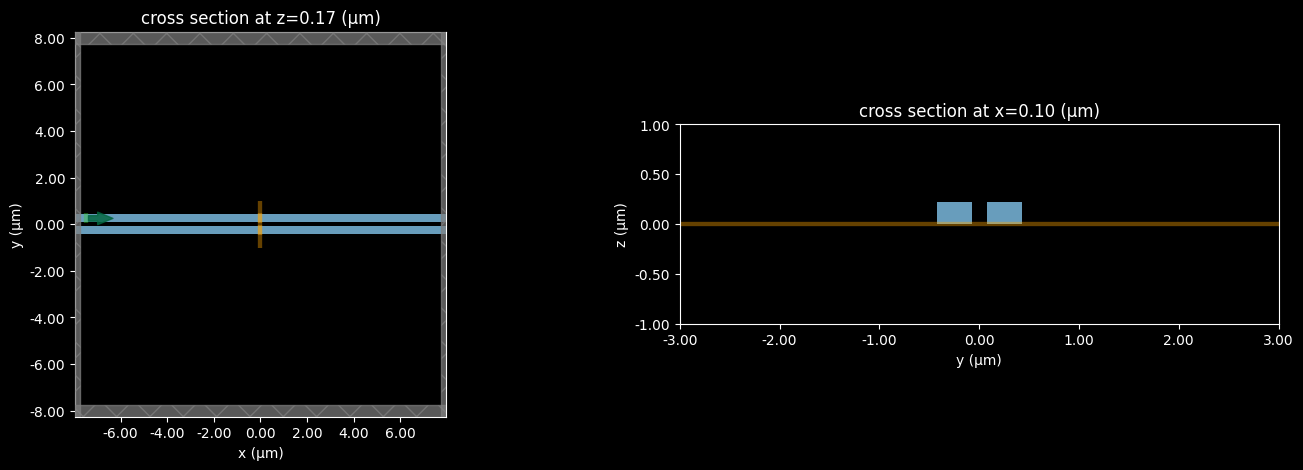

IndexError: tuple index out of range

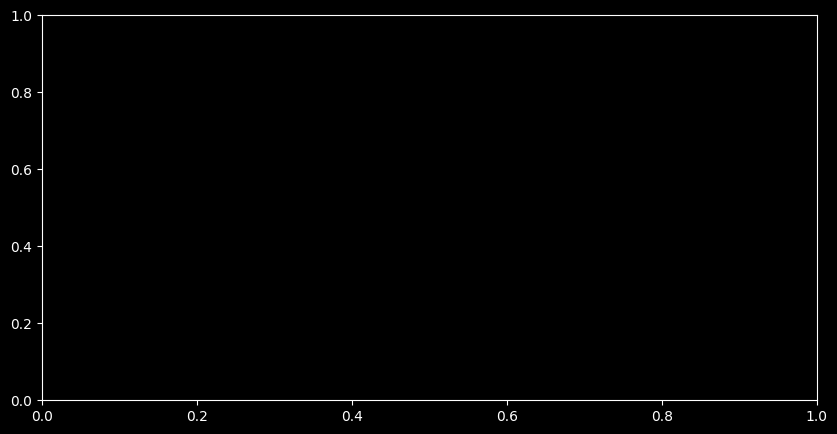

In [18]:

def extract_nonzero_columns(padded_array):
    """
    Extracts the non-zero contiguous part of each column in a
    zero-padded 2D array.

    Parameters
    ----------
    padded_array : np.ndarray
        2D array where each column is zero-padded but contains
        a contiguous block of non-zero values.

    Returns
    -------
    list_of_arrays : list of np.ndarray
        List containing 1D arrays ready for plotting.
    """

    padded_array = np.asarray(padded_array)

    if padded_array.ndim != 2:
        raise ValueError("Input must be a 2D array.")

    extracted = []

    for col in padded_array.T:  # iterate over columns

        nonzero_indices = np.nonzero(col)[0]

        if len(nonzero_indices) == 0:
            extracted.append(np.array([]))
        else:
            start = nonzero_indices[0]
            end = nonzero_indices[-1] + 1
            extracted.append(col[start:end])

    return extracted


def count_nonzero_per_row(padded_array):
    """
    Counts the number of non-zero elements in each row
    of a 2D array.

    Parameters
    ----------
    padded_array : np.ndarray
        2D array possibly containing zero padding.

    Returns
    -------
    counts : np.ndarray
        1D array containing the number of non-zero
        elements in each row.
    """

    padded_array = np.asarray(padded_array)

    if padded_array.ndim != 2:
        raise ValueError("Input must be a 2D array.")

    counts = np.count_nonzero(padded_array, axis=1)

    return counts

def build_slot_simulation(
    gap=0.15,
    width=0.350,
    thickness=0.22,
    wavelength = np.array([1.55]),
    num_modes=2, # for the first two modes , TE supermodes, the following ones are TM modes
):

    # Frequency
    freq = td.C_0 / wavelength

    # Materials
    core = mat_si
    clad = mat_sio2

    # --- Define two silicon rails ---
    rail_offset = width/2 + gap/2

    rail_right = td.Structure(
        geometry=td.Box(
            center=(0, rail_offset, thickness/2),
            size=(td.inf, width, thickness),
        ),
        medium=core,
    )

    rail_left = td.Structure(
        geometry=td.Box(
            center=(0, -rail_offset, thickness/2),
            size=(td.inf, width, thickness),
        ),
        medium=core,
    )


    #--- Define Sources ---

    source1 = td.ModeSource(
    center = [-7.5, width / 2 + gap / 2, thickness / 2],
    size = [0, width + gap / 2, thickness + 0.5],
    source_time = td.GaussianPulse(freq0 = td.C_0/wavelength, fwidth =bandwidth/wavelength * td.C_0/wavelength, ),
    direction = '+', )


    # --- Define monitors ---

    Through = td.FieldMonitor(
    name="Through",
    center = [0, rail_offset, thickness / 2],
    size = [0, width + gap / 2, thickness + 0.5],
    freqs = freq,
    )

    Cross = td.FieldMonitor(
    name="Cross",
    center = [0, -rail_offset, thickness / 2],
    size = [0, width + gap / 2, thickness + 0.5],
    freqs = freq,
    )


    Both = td.FieldMonitor(
    name="Both",
    size = [0, 2, 2],
    freqs = freq,
    )

    Longitudinal = td.FieldMonitor(
        name="Longitudinal",
        size = [16, 7.75, 0],
        freqs = freq,
    )

    # --- Simulation domain ---
    sim = td.Simulation(
        size=(15.5, 15.5, 15.5),  # x ignored for mode solver
        monitors=[Cross,Through,Longitudinal,Both],
        sources=[source1],
        structures=[rail_right, rail_left],
        medium=clad,
        # symmetry=(0, 1, 0),  # symmetry in y (even supermode)
        run_time=1e-12,
        grid_spec=td.GridSpec.auto(wavelength = 1.55,min_steps_per_wvl=25),
    )

    sim_data = web.run(sim, task_name='DC_FDTD')

    return sim_data, sim


sim_data, sim = build_slot_simulation()

Cross_mon = sim_data["Cross"]
Through_mon = sim_data["Through"]
Both_mon = sim_data["Both"]
Longitudinal_mon = sim_data["Longitudinal"]




fig0, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 5))

sim.plot(z = width/ 2, lw=1, ax=ax1)
sim.plot(x=0, lw=1, ax=ax2)

ax2.set_xlim([-3, 3])
_ = ax2.set_ylim([-1, 1])

plt.show()



mode_index = 1

# Extract field


fig1,axes = plt.subplots(nrows=1, ncols=1,  figsize=(10,5))
# data.Ey.real.isel(mode_index = mode_index).squeeze().plot(ax = axes,x = 'y', y = 'z', cmap= 'RdBu_r',vmin = -60,vmax = 60)
Longitudinal_mon.Ey.abs.isel(f = 0).squeeze().plot(ax = axes,x = 'y', y = 'z')
print(Both_mon)

plt.xlabel("y (μm)")
plt.ylabel("z (μm)")
plt.title(f"Mode {mode_index} |Ey|")
plt.tight_layout()
plt.show()